# Evaluation examples

In [144]:
%load_ext autoreload
%autoreload 2
import numpy as np
from clustercausal.experiments.Simulator import Simulator
from clustercausal.experiments.Evaluator import Evaluator
from clustercausal.algorithms.ClusterPC import ClusterPC
from clustercausal.clusterdag.ClusterDAG import ClusterDAG
from clustercausal.utils.Utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [145]:
%autoreload 2
simulation = Simulator(n_nodes = 10, n_edges = 17, n_clusters = 5, seed = 12343, sample_size = 100, \
                       node_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
cluster_dag = simulation.run()

2023-07-27 20:28:40,331 - c:\Users\JanMarco\MLProjects\Masterthesis\masterthesis\mthesis\lib\site-packages\castle\datasets\simulator.py[line:270] - INFO: Finished synthetic dataset


In [146]:
print(cluster_dag.cluster_mapping)
print(cluster_dag.cluster_edges)

{'C1': ['3', '4'], 'C2': ['5', '7'], 'C3': ['0', '2'], 'C4': ['8', '6', '9'], 'C5': ['1']}
[('C1', 'C3'), ('C3', 'C4'), ('C3', 'C5'), ('C1', 'C5'), ('C2', 'C5'), ('C4', 'C5'), ('C1', 'C4'), ('C2', 'C4')]


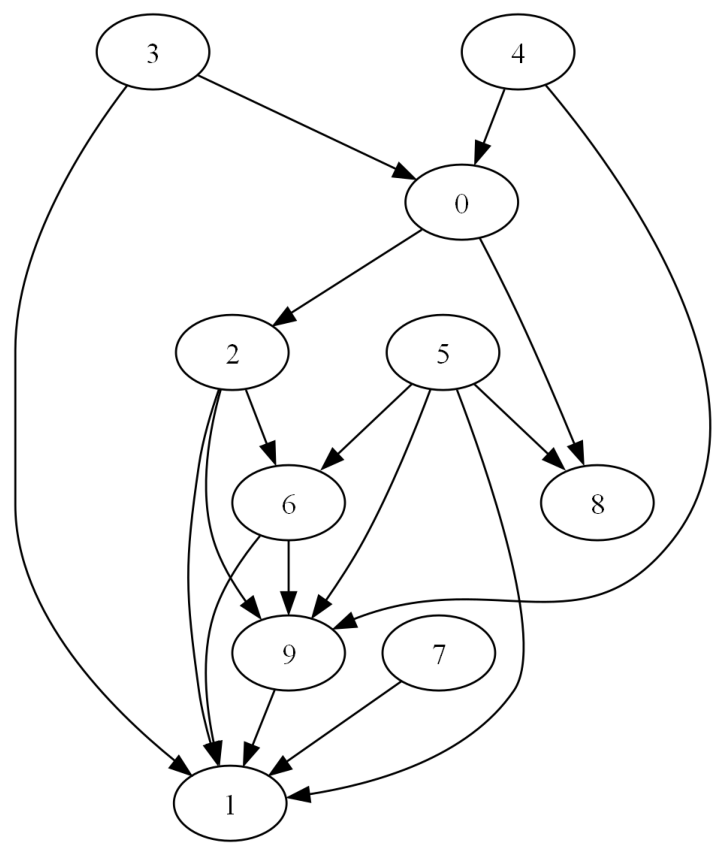

In [147]:
cluster_dag.true_dag.draw_pydot_graph()

In [148]:
# cluster_dag.cdag_to_mpdag()
# cluster_dag.draw_mpdag()

In [149]:
# c4 = ClusterDAG.get_node_by_name('C4', cluster_dag.cluster_graph)
# c4_local_graph = cluster_dag.get_local_graph(cluster = c4)
# c4_local_graph.draw_pydot_graph()

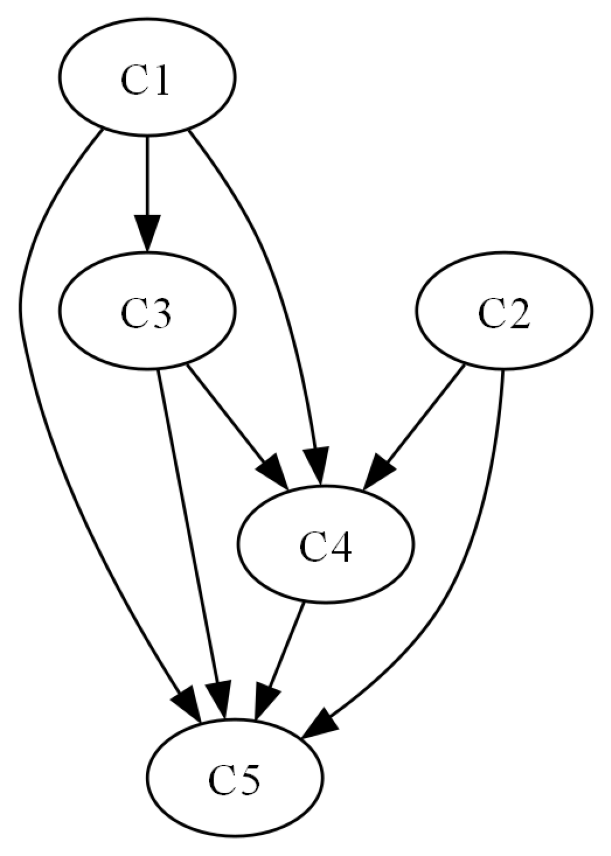

In [150]:
cluster_dag.draw_cluster_graph()

In [151]:
cluster_pc = ClusterPC(cdag = cluster_dag, data = cluster_dag.data, alpha = 0.05, \
                  indep_test = "fisherz", \
                  verbose = True, show_progress=True)
est_graph = cluster_pc.run()

Topological ordering['C1', 'C2', 'C3', 'C4', 'C5']
Cluster node indices are [3 4]
Local graph node indices are [3 4]


Intra: C1    , Depth=0, working on node 4: 100%|██████████| 2/2 [00:00<00:00, 333.38it/s, duration: 0.01sec]


Neighbors of 3 in C1 are [4]
Testing edges from 3 to 4
3 ind 4 | () with p-value 0.071047
Neighbors of 4 in C1 are [3]
Testing edges from 4 to 3
4 ind 3 | () with p-value 0.071047
Deleted edge from 3 to 4
Cluster node indices are [5 7]
Local graph node indices are [5 7]


Intra: C2    , Depth=0, working on node 7: 100%|██████████| 2/2 [00:00<00:00, 250.15it/s, duration: 0.01sec]


Neighbors of 5 in C2 are [7]
Testing edges from 5 to 7
5 ind 7 | () with p-value 0.942978
Neighbors of 7 in C2 are [5]
Testing edges from 7 to 5
7 ind 5 | () with p-value 0.942978
Deleted edge from 7 to 5
Cluster node indices are [0 2 3 4]
Local graph node indices are [0 2 3 4]


Inter: C1->C3, Depth=2, working on node 4: 100%|██████████| 4/4 [00:00<00:00, 445.53it/s, duration: 0.04sec]


Neighbors of 0 in (C3,C1) are [2 3 4]
Testing edges from 0 to 2
0 dep 2 | () with p-value 0.000000
Testing edges from 0 to 3
0 dep 3 | () with p-value 0.000001
Testing edges from 0 to 4
0 dep 4 | () with p-value 0.000000
Neighbors of 2 in (C3,C1) are [0 3 4]
Testing edges from 2 to 0
2 dep 0 | () with p-value 0.000000
Testing edges from 2 to 3
2 dep 3 | () with p-value 0.003590
Testing edges from 2 to 4
2 dep 4 | () with p-value 0.000000
Neighbors of 3 in (C3,C1) are [0 2]
Testing edges from 3 to 0
3 dep 0 | () with p-value 0.000001
Testing edges from 3 to 2
3 dep 2 | () with p-value 0.003590
Neighbors of 4 in (C3,C1) are [0 2]
Testing edges from 4 to 0
4 dep 0 | () with p-value 0.000000
Testing edges from 4 to 2
4 dep 2 | () with p-value 0.000000
Neighbors of 0 in (C3,C1) are [2 3 4]
Testing edges from 0 to 2
0 dep 2 | (3,) with p-value 0.000000
0 dep 2 | (4,) with p-value 0.000030
Testing edges from 0 to 3
0 dep 3 | (2,) with p-value 0.000132
0 dep 3 | (4,) with p-value 0.000000
Test

Intra: C3    , Depth=2, working on node 2: 100%|██████████| 2/2 [00:00<00:00, 337.18it/s, duration: 0.02sec]


Neighbors of 0 in C3 are [2]
Testing edges from 0 to 2
0 dep 2 | () with p-value 0.000000
Neighbors of 2 in C3 are [0]
Testing edges from 2 to 0
2 dep 0 | () with p-value 0.000000
Neighbors of 0 in C3 are [2]
Testing edges from 0 to 2
0 dep 2 | (3,) with p-value 0.000000
0 dep 2 | (4,) with p-value 0.000030
Neighbors of 2 in C3 are [0]
Testing edges from 2 to 0
2 dep 0 | (4,) with p-value 0.000030
Neighbors of 0 in C3 are [2]
Testing edges from 0 to 2
0 dep 2 | (3, 4) with p-value 0.000533
Neighbors of 2 in C3 are [0]
Testing edges from 2 to 0
Cluster node indices are [3 4 6 8 9]
Local graph node indices are [3 4 6 8 9]


Inter: C1->C4, Depth=4, working on node 9: 100%|██████████| 5/5 [00:00<00:00, 500.02it/s, duration: 0.09sec]

Neighbors of 3 in (C4,C1) are [6 8 9]
Testing edges from 3 to 6
3 dep 6 | () with p-value 0.001157
Testing edges from 3 to 8
3 ind 8 | () with p-value 0.277372
Testing edges from 3 to 9
3 ind 9 | () with p-value 0.178959
Neighbors of 4 in (C4,C1) are [6 8 9]
Testing edges from 4 to 6
4 ind 6 | () with p-value 0.138982
Testing edges from 4 to 8
4 dep 8 | () with p-value 0.000715
Testing edges from 4 to 9
4 dep 9 | () with p-value 0.000000
Neighbors of 6 in (C4,C1) are [3 4 8 9]
Testing edges from 6 to 3
6 dep 3 | () with p-value 0.001157
Testing edges from 6 to 4
6 ind 4 | () with p-value 0.138982
Testing edges from 6 to 8
6 dep 8 | () with p-value 0.000000
Testing edges from 6 to 9
6 dep 9 | () with p-value 0.004992
Neighbors of 8 in (C4,C1) are [3 4 6 9]
Testing edges from 8 to 3
8 ind 3 | () with p-value 0.277372
Testing edges from 8 to 4
8 dep 4 | () with p-value 0.000715
Testing edges from 8 to 6
8 dep 6 | () with p-value 0.000000
Testing edges from 8 to 9
8 ind 9 | () with p-value

Cluster node indices are [5 6 7 8 9]
Local graph node indices are [5 6 7 8 9]


Inter: C2->C4, Depth=0, working on node 9: 100%|██████████| 5/5 [00:00<00:00, 500.27it/s]

Neighbors of 5 in (C4,C2) are [6 8 9]
Testing edges from 5 to 6
5 dep 6 | () with p-value 0.000000
Testing edges from 5 to 8
5 dep 8 | () with p-value 0.000000
Testing edges from 5 to 9
5 dep 9 | () with p-value 0.016384
Neighbors of 6 in (C4,C2) are [5 7]
Testing edges from 6 to 5
6 dep 5 | () with p-value 0.000000
Testing edges from 6 to 7
6 ind 7 | () with p-value 0.914374
Neighbors of 7 in (C4,C2) are [6 8 9]
Testing edges from 7 to 6
7 ind 6 | () with p-value 0.914374
Testing edges from 7 to 8
7 ind 8 | () with p-value 0.542101
Testing edges from 7 to 9
7 ind 9 | () with p-value 0.410197
Neighbors of 8 in (C4,C2) are [5 7]
Testing edges from 8 to 5
8 dep 5 | () with p-value 0.000000
Testing edges from 8 to 7
8 ind 7 | () with p-value 0.542101


Inter: C2->C4, Depth=1, working on node 6:  40%|████      | 2/5 [00:00<00:00, 399.97it/s] 

Neighbors of 9 in (C4,C2) are [5 7]
Testing edges from 9 to 5
9 dep 5 | () with p-value 0.016384
Testing edges from 9 to 7
9 ind 7 | () with p-value 0.410197
Deleted edge from 8 to 7
Deleted edge from 7 to 9
Deleted edge from 6 to 7
Neighbors of 5 in (C4,C2) are [6 8 9]
Testing edges from 5 to 6
5 dep 6 | (8,) with p-value 0.000000
5 dep 6 | (9,) with p-value 0.000000
Testing edges from 5 to 8
5 dep 8 | (6,) with p-value 0.000000
5 dep 8 | (9,) with p-value 0.000000
Testing edges from 5 to 9
5 ind 9 | (6,) with p-value 0.943889
5 dep 9 | (8,) with p-value 0.000001


Inter: C2->C4, Depth=2, working on node 9: 100%|██████████| 5/5 [00:00<00:00, 417.09it/s, duration: 0.05sec]


Neighbors of 6 in (C4,C2) are [5]
Testing edges from 6 to 5
6 dep 5 | (0,) with p-value 0.000000
6 dep 5 | (2,) with p-value 0.000000
Neighbors of 7 in (C4,C2) are []
Neighbors of 8 in (C4,C2) are [5]
Testing edges from 8 to 5
8 dep 5 | (0,) with p-value 0.000000
8 dep 5 | (2,) with p-value 0.000000
Neighbors of 9 in (C4,C2) are [5]
Testing edges from 9 to 5
9 dep 5 | (0,) with p-value 0.017156
9 ind 5 | (2,) with p-value 0.052916
9 dep 5 | (4,) with p-value 0.002811
Deleted edge from 5 to 9
Neighbors of 5 in (C4,C2) are [6 8]
Testing edges from 5 to 6
Testing edges from 5 to 8
Neighbors of 6 in (C4,C2) are [5]
Testing edges from 6 to 5
6 dep 5 | (0, 2) with p-value 0.000000
Neighbors of 7 in (C4,C2) are []
Neighbors of 8 in (C4,C2) are [5]
Testing edges from 8 to 5
8 dep 5 | (0, 2) with p-value 0.000000
Neighbors of 9 in (C4,C2) are []
Cluster node indices are [0 2 6 8 9]
Local graph node indices are [0 2 6 8 9]


Inter: C3->C4, Depth=1, working on node 2:  40%|████      | 2/5 [00:00<00:00, 196.86it/s] 

Neighbors of 0 in (C4,C3) are [2 6 8 9]
Testing edges from 0 to 2
0 dep 2 | () with p-value 0.000000
Testing edges from 0 to 6
0 dep 6 | () with p-value 0.008707
Testing edges from 0 to 8
0 dep 8 | () with p-value 0.000896
Testing edges from 0 to 9
0 dep 9 | () with p-value 0.000000
Neighbors of 2 in (C4,C3) are [0 6 8 9]
Testing edges from 2 to 0
2 dep 0 | () with p-value 0.000000
Testing edges from 2 to 6
2 dep 6 | () with p-value 0.000043
Testing edges from 2 to 8
2 dep 8 | () with p-value 0.042351
Testing edges from 2 to 9
2 dep 9 | () with p-value 0.000000
Neighbors of 6 in (C4,C3) are [0 2]
Testing edges from 6 to 0
6 dep 0 | () with p-value 0.008707
Testing edges from 6 to 2
6 dep 2 | () with p-value 0.000043
Neighbors of 8 in (C4,C3) are [0 2]
Testing edges from 8 to 0
8 dep 0 | () with p-value 0.000896
Testing edges from 8 to 2
8 dep 2 | () with p-value 0.042351
Neighbors of 9 in (C4,C3) are [0 2]
Testing edges from 9 to 0
9 dep 0 | () with p-value 0.000000
Testing edges from 

Inter: C3->C4, Depth=1, working on node 6:  60%|██████    | 3/5 [00:00<00:00, 174.66it/s]

Neighbors of 2 in (C4,C3) are [0 6 8 9]
Testing edges from 2 to 0
2 dep 0 | (4,) with p-value 0.000030
2 dep 0 | (6,) with p-value 0.000000
2 dep 0 | (8,) with p-value 0.000000
2 dep 0 | (9,) with p-value 0.000000
Testing edges from 2 to 6
2 dep 6 | (0,) with p-value 0.001951
2 dep 6 | (4,) with p-value 0.000041
2 dep 6 | (8,) with p-value 0.000000
2 dep 6 | (9,) with p-value 0.003359
Testing edges from 2 to 8
2 ind 8 | (0,) with p-value 0.708691
2 ind 8 | (4,) with p-value 0.851089
2 dep 8 | (6,) with p-value 0.000000
2 dep 8 | (9,) with p-value 0.011050
Testing edges from 2 to 9
2 dep 9 | (0,) with p-value 0.000000
2 dep 9 | (4,) with p-value 0.000001
2 dep 9 | (6,) with p-value 0.000000
2 dep 9 | (8,) with p-value 0.000000
Neighbors of 6 in (C4,C3) are [0 2]
Testing edges from 6 to 0
6 ind 0 | (2,) with p-value 0.804108
6 dep 0 | (5,) with p-value 0.000013
Testing edges from 6 to 2
6 dep 2 | (0,) with p-value 0.001951
6 dep 2 | (5,) with p-value 0.000000


Inter: C3->C4, Depth=1, working on node 9: 100%|██████████| 5/5 [00:00<00:00, 160.41it/s, duration: 0.05sec]


Neighbors of 8 in (C4,C3) are [0 2]
Testing edges from 8 to 0
8 dep 0 | (2,) with p-value 0.008683
8 dep 0 | (5,) with p-value 0.000000
Testing edges from 8 to 2
8 ind 2 | (0,) with p-value 0.708691
8 dep 2 | (5,) with p-value 0.000000
Neighbors of 9 in (C4,C3) are [0 2]
Testing edges from 9 to 0
9 ind 0 | (2,) with p-value 0.538289
9 ind 0 | (4,) with p-value 0.282813
Testing edges from 9 to 2
9 dep 2 | (0,) with p-value 0.000000
9 dep 2 | (4,) with p-value 0.000001
Deleted edge from 9 to 0
Deleted edge from 8 to 0
Deleted edge from 0 to 6
Deleted edge from 8 to 2
Cluster node indices are [6 8 9]
Local graph node indices are [6 8 9]


Intra: C4    , Depth=1, working on node 9: 100%|██████████| 3/3 [00:00<00:00, 501.19it/s, duration: 0.02sec]


Neighbors of 6 in C4 are []
Neighbors of 8 in C4 are []
Neighbors of 9 in C4 are []
Neighbors of 6 in C4 are []
Neighbors of 8 in C4 are []
Neighbors of 9 in C4 are []
Cluster node indices are [1 3 4]
Local graph node indices are [1 3 4]


Inter: C1->C5, Depth=5, working on node 4:   0%|          | 0/3 [00:00<?, ?it/s]          

Neighbors of 1 in (C5,C1) are [3 4]
Testing edges from 1 to 3
1 dep 3 | () with p-value 0.006641
Testing edges from 1 to 4
1 dep 4 | () with p-value 0.000017
Neighbors of 3 in (C5,C1) are [1]
Testing edges from 3 to 1
3 dep 1 | () with p-value 0.006641
Neighbors of 4 in (C5,C1) are [1]
Testing edges from 4 to 1
4 dep 1 | () with p-value 0.000017
Neighbors of 1 in (C5,C1) are [3 4]
Testing edges from 1 to 3
1 ind 3 | (0,) with p-value 0.298823
1 ind 3 | (2,) with p-value 0.120112
1 dep 3 | (4,) with p-value 0.030906
1 ind 3 | (5,) with p-value 0.079091
1 ind 3 | (6,) with p-value 0.113066
1 dep 3 | (7,) with p-value 0.006938
1 dep 3 | (8,) with p-value 0.012018
1 dep 3 | (9,) with p-value 0.001670
Testing edges from 1 to 4
1 ind 4 | (0,) with p-value 0.099460
1 ind 4 | (2,) with p-value 0.137682
1 dep 4 | (3,) with p-value 0.000080
1 dep 4 | (5,) with p-value 0.000000
1 dep 4 | (6,) with p-value 0.000062
1 dep 4 | (7,) with p-value 0.000021
1 dep 4 | (8,) with p-value 0.000000
1 ind 4 |

Inter: C1->C5, Depth=6, working on node 4: 100%|██████████| 3/3 [00:00<00:00, 502.01it/s, duration: 0.07sec]


Neighbors of 1 in (C5,C1) are []
Neighbors of 3 in (C5,C1) are []
Neighbors of 4 in (C5,C1) are []
Cluster node indices are [1 5 7]
Local graph node indices are [1 5 7]


Inter: C2->C5, Depth=1, working on node 5:  67%|██████▋   | 2/3 [00:00<00:00, 401.64it/s] 

Neighbors of 1 in (C5,C2) are [5 7]
Testing edges from 1 to 5
1 dep 5 | () with p-value 0.000000
Testing edges from 1 to 7
1 ind 7 | () with p-value 0.658888
Neighbors of 5 in (C5,C2) are [1]
Testing edges from 5 to 1
5 dep 1 | () with p-value 0.000000
Neighbors of 7 in (C5,C2) are [1]
Testing edges from 7 to 1
7 ind 1 | () with p-value 0.658888
Deleted edge from 1 to 7
Neighbors of 1 in (C5,C2) are [5]
Testing edges from 1 to 5
1 dep 5 | (0,) with p-value 0.000000
1 dep 5 | (2,) with p-value 0.000000
1 dep 5 | (6,) with p-value 0.004159
1 dep 5 | (8,) with p-value 0.000000
1 dep 5 | (9,) with p-value 0.000000


Inter: C2->C5, Depth=4, working on node 5:  67%|██████▋   | 2/3 [00:00<00:00, 502.49it/s]

Neighbors of 5 in (C5,C2) are [1]
Testing edges from 5 to 1
5 dep 1 | (6,) with p-value 0.004159
5 dep 1 | (8,) with p-value 0.000000
Neighbors of 7 in (C5,C2) are []
Neighbors of 1 in (C5,C2) are [5]
Testing edges from 1 to 5
1 dep 5 | (0, 2) with p-value 0.000000
1 dep 5 | (0, 6) with p-value 0.000002
1 dep 5 | (0, 8) with p-value 0.006695
1 dep 5 | (0, 9) with p-value 0.000000
1 dep 5 | (2, 6) with p-value 0.000000
1 dep 5 | (2, 8) with p-value 0.003784
1 dep 5 | (2, 9) with p-value 0.000000
1 dep 5 | (6, 8) with p-value 0.000004
1 dep 5 | (6, 9) with p-value 0.000000
1 dep 5 | (8, 9) with p-value 0.009271
Neighbors of 5 in (C5,C2) are [1]
Testing edges from 5 to 1
5 dep 1 | (6, 8) with p-value 0.000004
Neighbors of 7 in (C5,C2) are []
Neighbors of 1 in (C5,C2) are [5]
Testing edges from 1 to 5
1 dep 5 | (0, 2, 6) with p-value 0.000000
1 dep 5 | (0, 2, 8) with p-value 0.034098
1 dep 5 | (0, 2, 9) with p-value 0.000000
1 dep 5 | (0, 6, 8) with p-value 0.000173
1 dep 5 | (0, 6, 9) wit

Inter: C2->C5, Depth=5, working on node 7: 100%|██████████| 3/3 [00:00<00:00, 376.02it/s, duration: 0.07sec]

Neighbors of 5 in (C5,C2) are [1]
Testing edges from 5 to 1
Neighbors of 7 in (C5,C2) are []
Neighbors of 1 in (C5,C2) are [5]
Testing edges from 1 to 5
1 dep 5 | (0, 2, 6, 8, 9) with p-value 0.000442
Neighbors of 5 in (C5,C2) are [1]
Neighbors of 7 in (C5,C2) are []


Inter: C2->C5, Depth=5, working on node 7: 100%|██████████| 3/3 [00:00<00:00, 334.17it/s, duration: 0.07sec]


Cluster node indices are [0 1 2]
Local graph node indices are [0 1 2]


Inter: C3->C5, Depth=0, working on node 2: 100%|██████████| 3/3 [00:00<00:00, 600.93it/s] 

Neighbors of 0 in (C5,C3) are [1 2]
Testing edges from 0 to 1
0 dep 1 | () with p-value 0.000028
Testing edges from 0 to 2
0 dep 2 | () with p-value 0.000000
Neighbors of 1 in (C5,C3) are [0 2]
Testing edges from 1 to 0
1 dep 0 | () with p-value 0.000028
Testing edges from 1 to 2
1 dep 2 | () with p-value 0.000000
Neighbors of 2 in (C5,C3) are [0 1]
Testing edges from 2 to 0
2 dep 0 | () with p-value 0.000000
Testing edges from 2 to 1
2 dep 1 | () with p-value 0.000000


Inter: C3->C5, Depth=1, working on node 2:   0%|          | 0/3 [00:00<?, ?it/s]          

Neighbors of 0 in (C5,C3) are [1 2]
Testing edges from 0 to 1
0 ind 1 | (2,) with p-value 0.285628
0 dep 1 | (3,) with p-value 0.000937
0 ind 1 | (4,) with p-value 0.174560
Testing edges from 0 to 2
0 dep 2 | (1,) with p-value 0.000000
0 dep 2 | (3,) with p-value 0.000000
0 dep 2 | (4,) with p-value 0.000030
Neighbors of 1 in (C5,C3) are [0 2]
Testing edges from 1 to 0
1 ind 0 | (2,) with p-value 0.285628
1 dep 0 | (5,) with p-value 0.000010
1 dep 0 | (6,) with p-value 0.000644
1 dep 0 | (8,) with p-value 0.000000
1 ind 0 | (9,) with p-value 0.438087
Testing edges from 1 to 2
1 dep 2 | (0,) with p-value 0.003021
1 dep 2 | (5,) with p-value 0.000001
1 dep 2 | (6,) with p-value 0.000123
1 dep 2 | (8,) with p-value 0.000000
1 dep 2 | (9,) with p-value 0.004939
Neighbors of 2 in (C5,C3) are [0 1]
Testing edges from 2 to 0
2 dep 0 | (1,) with p-value 0.000000
2 dep 0 | (4,) with p-value 0.000030
2 dep 0 | (6,) with p-value 0.000000
2 dep 0 | (9,) with p-value 0.000000
Testing edges from 2 t

Inter: C3->C5, Depth=2, working on node 2: 100%|██████████| 3/3 [00:00<00:00, 216.14it/s] 

Neighbors of 0 in (C5,C3) are [2]
Testing edges from 0 to 2
0 dep 2 | (3, 4) with p-value 0.000533
Neighbors of 1 in (C5,C3) are [2]
Testing edges from 1 to 2
1 dep 2 | (5, 6) with p-value 0.000000
1 dep 2 | (5, 8) with p-value 0.000150
1 dep 2 | (5, 9) with p-value 0.000932
1 dep 2 | (6, 8) with p-value 0.000001
1 dep 2 | (6, 9) with p-value 0.000009
1 ind 2 | (8, 9) with p-value 0.085963
Neighbors of 2 in (C5,C3) are [0 1]
Testing edges from 2 to 0
2 dep 0 | (1, 4) with p-value 0.000090
2 dep 0 | (1, 6) with p-value 0.000000
2 dep 0 | (1, 9) with p-value 0.000000
2 dep 0 | (4, 6) with p-value 0.000438
2 dep 0 | (4, 9) with p-value 0.000038
2 dep 0 | (6, 9) with p-value 0.000000
Testing edges from 2 to 1
2 dep 1 | (0, 4) with p-value 0.007817
2 dep 1 | (0, 6) with p-value 0.036912
2 dep 1 | (0, 9) with p-value 0.004024
2 ind 1 | (4, 6) with p-value 0.093377
2 dep 1 | (4, 9) with p-value 0.030663
2 dep 1 | (6, 9) with p-value 0.000009


Inter: C3->C5, Depth=3, working on node 2: 100%|██████████| 3/3 [00:00<00:00, 333.55it/s, duration: 0.06sec]


Deleted edge from 1 to 2
Neighbors of 0 in (C5,C3) are [2]
Testing edges from 0 to 2
Neighbors of 1 in (C5,C3) are []
Neighbors of 2 in (C5,C3) are [0]
Testing edges from 2 to 0
2 dep 0 | (4, 6, 9) with p-value 0.000313
Cluster node indices are [1 6 8 9]
Local graph node indices are [1 6 8 9]


Inter: C4->C5, Depth=1, working on node 9: 100%|██████████| 4/4 [00:00<00:00, 222.43it/s, duration: 0.04sec]


Neighbors of 1 in (C5,C4) are [6 8 9]
Testing edges from 1 to 6
1 dep 6 | () with p-value 0.000019
Testing edges from 1 to 8
1 dep 8 | () with p-value 0.012417
Testing edges from 1 to 9
1 dep 9 | () with p-value 0.000000
Neighbors of 6 in (C5,C4) are [1]
Testing edges from 6 to 1
6 dep 1 | () with p-value 0.000019
Neighbors of 8 in (C5,C4) are [1]
Testing edges from 8 to 1
8 dep 1 | () with p-value 0.012417
Neighbors of 9 in (C5,C4) are [1]
Testing edges from 9 to 1
9 dep 1 | () with p-value 0.000000
Neighbors of 1 in (C5,C4) are [6 8 9]
Testing edges from 1 to 6
1 ind 6 | (5,) with p-value 0.758506
1 dep 6 | (8,) with p-value 0.000643
1 dep 6 | (9,) with p-value 0.000290
Testing edges from 1 to 8
1 dep 8 | (5,) with p-value 0.001629
1 ind 8 | (6,) with p-value 0.942882
1 dep 8 | (9,) with p-value 0.000000
Testing edges from 1 to 9
1 dep 9 | (5,) with p-value 0.000000
1 dep 9 | (6,) with p-value 0.000000
1 dep 9 | (8,) with p-value 0.000000
Neighbors of 6 in (C5,C4) are [1]
Testing edg

Intra: C5    , Depth=1, working on node 1: 100%|██████████| 1/1 [00:00<00:00, 199.94it/s, duration: 0.01sec]

Neighbors of 1 in C5 are []
Neighbors of 1 in C5 are []
Duration of algorithm was 0.59sec


In [152]:
print(cluster_dag.cluster_mapping.keys())

dict_keys(['C1', 'C2', 'C3', 'C4', 'C5'])


In [153]:
# print(cluster_dag.cluster_mapping['C2'])
# print(cluster_dag.cluster_mapping['C4'])

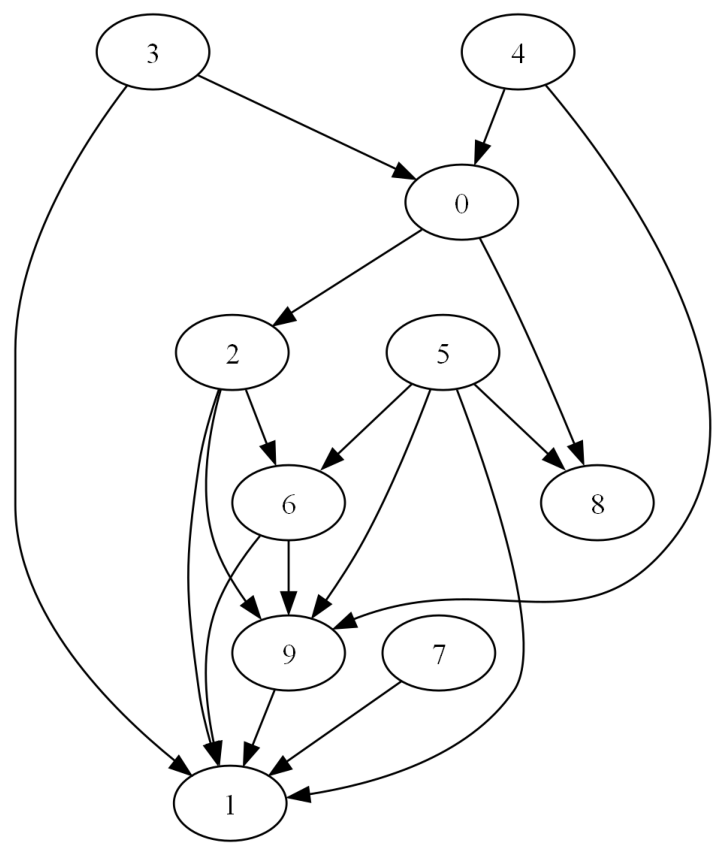

In [154]:
cluster_dag.true_dag.draw_pydot_graph()

In [155]:
# c4 = ClusterDAG.get_node_by_name('C4', cluster_dag.cluster_graph)
# c4_local_graph = cluster_dag.get_local_graph(cluster = c4)
# c4_local_graph.draw_pydot_graph()

In [156]:
# c4 = ClusterDAG.get_node_by_name('C4', cluster_dag.cluster_graph)
# c4_local_graph = cluster_dag.get_local_graph(cluster = c4)
# c4_local_graph.draw_pydot_graph()

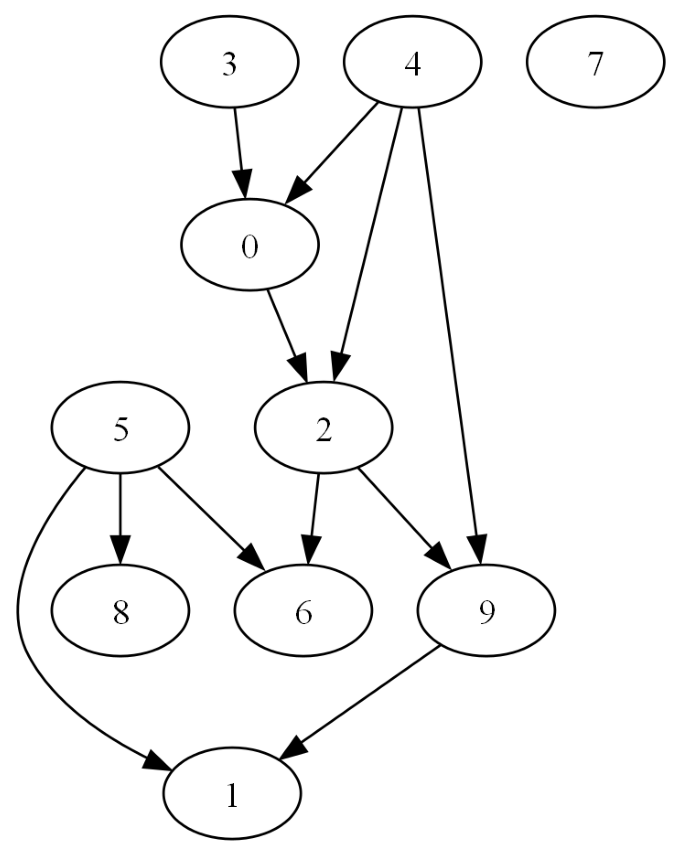

In [157]:
est_graph.draw_pydot_graph()

In [158]:
evaluation = Evaluator(truth = cluster_dag.true_dag.G, est = est_graph.G)
adjacency_confusion, arrow_confusion, shd = evaluation.get_causallearn_metrics()
print("Adjacency confusion: ", adjacency_confusion)
print("Arrow confusion: ", arrow_confusion)
print("SHD: ", shd)

Adjacency confusion:  {'true_positive': 10, 'false_positive': 1, 'false_negative': 7, 'true_negative': 27, 'precision': 0.9090909090909091, 'recall': 0.5882352941176471}
Arrow confusion:  {'true_positive': 10.0, 'false_positive': 1.0, 'false_negative': 7.0, 'true_negative': 82.0, 'precision': 0.9090909090909091, 'recall': 0.5882352941176471, 'true_positive_ce': 10.0, 'false_positive_ce': 0.0, 'false_negative_ce': 0.0, 'true_negative_ce': 90.0, 'precision_ce': 1.0, 'recall_ce': 1.0}
SHD:  8


In [168]:
# Comparison with baseline pc
from causallearn.search.ConstraintBased.PC import pc
node_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
causallearn_cg = pc(cluster_dag.data, node_names = node_names, alpha = 0.05, verbose=True)
evaluation_causallearn = Evaluator(truth = cluster_dag.true_dag.G, est = causallearn_cg.G)
cl_adjacency_confusion, cl_arrow_confusion, cl_shd = evaluation_causallearn.get_causallearn_metrics()
print("Adjacency confusion: ", cl_adjacency_confusion)
print("Arrow confusion: ", cl_arrow_confusion)
print("SHD: ", cl_shd)

Depth=2, working on node 7:  80%|████████  | 8/10 [00:00<00:00, 224.16it/s] 

0 dep 1 | () with p-value 0.000028

0 dep 2 | () with p-value 0.000000

0 dep 3 | () with p-value 0.000001

0 dep 4 | () with p-value 0.000000

0 ind 5 | () with p-value 0.518093

0 dep 6 | () with p-value 0.008707

0 ind 7 | () with p-value 0.247956

0 dep 8 | () with p-value 0.000896

0 dep 9 | () with p-value 0.000000

1 dep 0 | () with p-value 0.000028

1 dep 2 | () with p-value 0.000000

1 dep 3 | () with p-value 0.006641

1 dep 4 | () with p-value 0.000017

1 dep 5 | () with p-value 0.000000

1 dep 6 | () with p-value 0.000019

1 ind 7 | () with p-value 0.658888

1 dep 8 | () with p-value 0.012417

1 dep 9 | () with p-value 0.000000

2 dep 0 | () with p-value 0.000000

2 dep 1 | () with p-value 0.000000

2 dep 3 | () with p-value 0.003590

2 dep 4 | () with p-value 0.000000

2 ind 5 | () with p-value 0.157820

2 dep 6 | () with p-value 0.000043

2 ind 7 | () with p-value 0.289971

2 dep 8 | () with p-value 0.042351

2 dep 9 | () with p-value 0.000000

3 dep 0 | () with p-value 0.

Depth=2, working on node 9: 100%|██████████| 10/10 [00:00<00:00, 234.36it/s]

9 dep 1 | (2, 4) with p-value 0.000000

9 dep 2 | (1, 4) with p-value 0.000007

9 ind 4 | (1, 2) with p-value 0.065981

Max depth: 2
Adjacency confusion:  {'true_positive': 9, 'false_positive': 0, 'false_negative': 8, 'true_negative': 28, 'precision': 1.0, 'recall': 0.5294117647058824}
Arrow confusion:  {'true_positive': 8.0, 'false_positive': 0.0, 'false_negative': 9.0, 'true_negative': 83.0, 'precision': 1.0, 'recall': 0.47058823529411764, 'true_positive_ce': 8.0, 'false_positive_ce': 0.0, 'false_negative_ce': 1.0, 'true_negative_ce': 91.0, 'precision_ce': 1.0, 'recall_ce': 0.8888888888888888}
SHD:  8


In [160]:
print(adjacency_confusion == cl_adjacency_confusion)
print(arrow_confusion == cl_arrow_confusion)
print(shd == cl_shd)

False
False
True


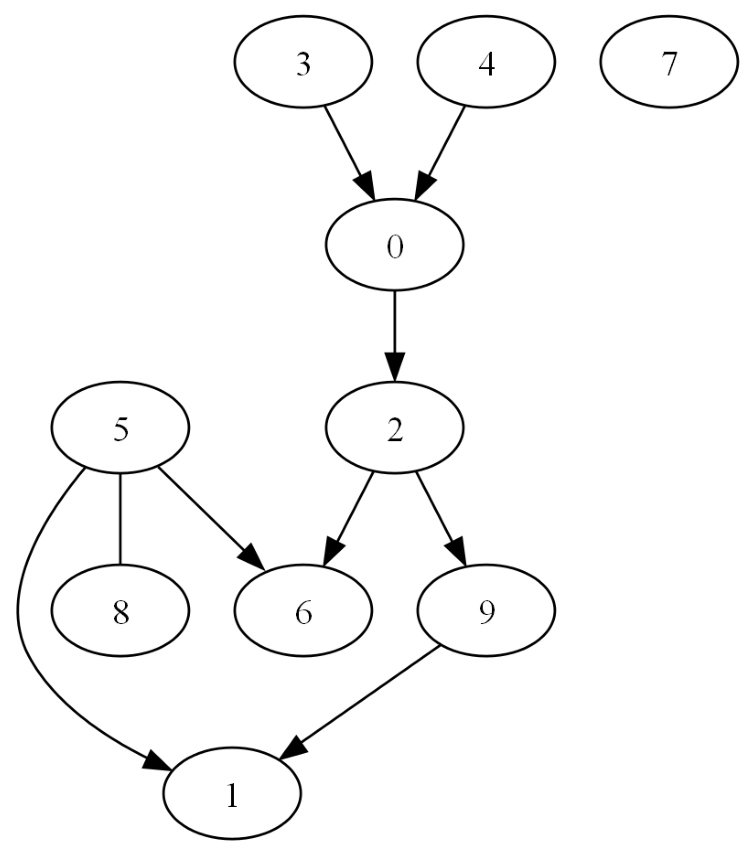

In [161]:
causallearn_cg.draw_pydot_graph()

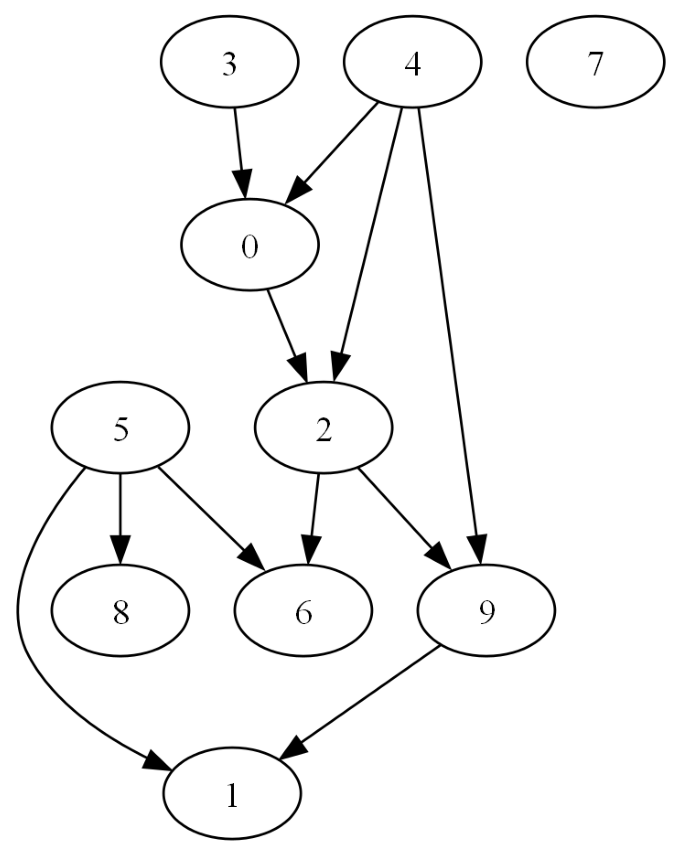

In [162]:
est_graph.draw_pydot_graph()

In [163]:
cluster_dag.cg.to_nx_graph()
causallearn_cg.to_nx_graph()

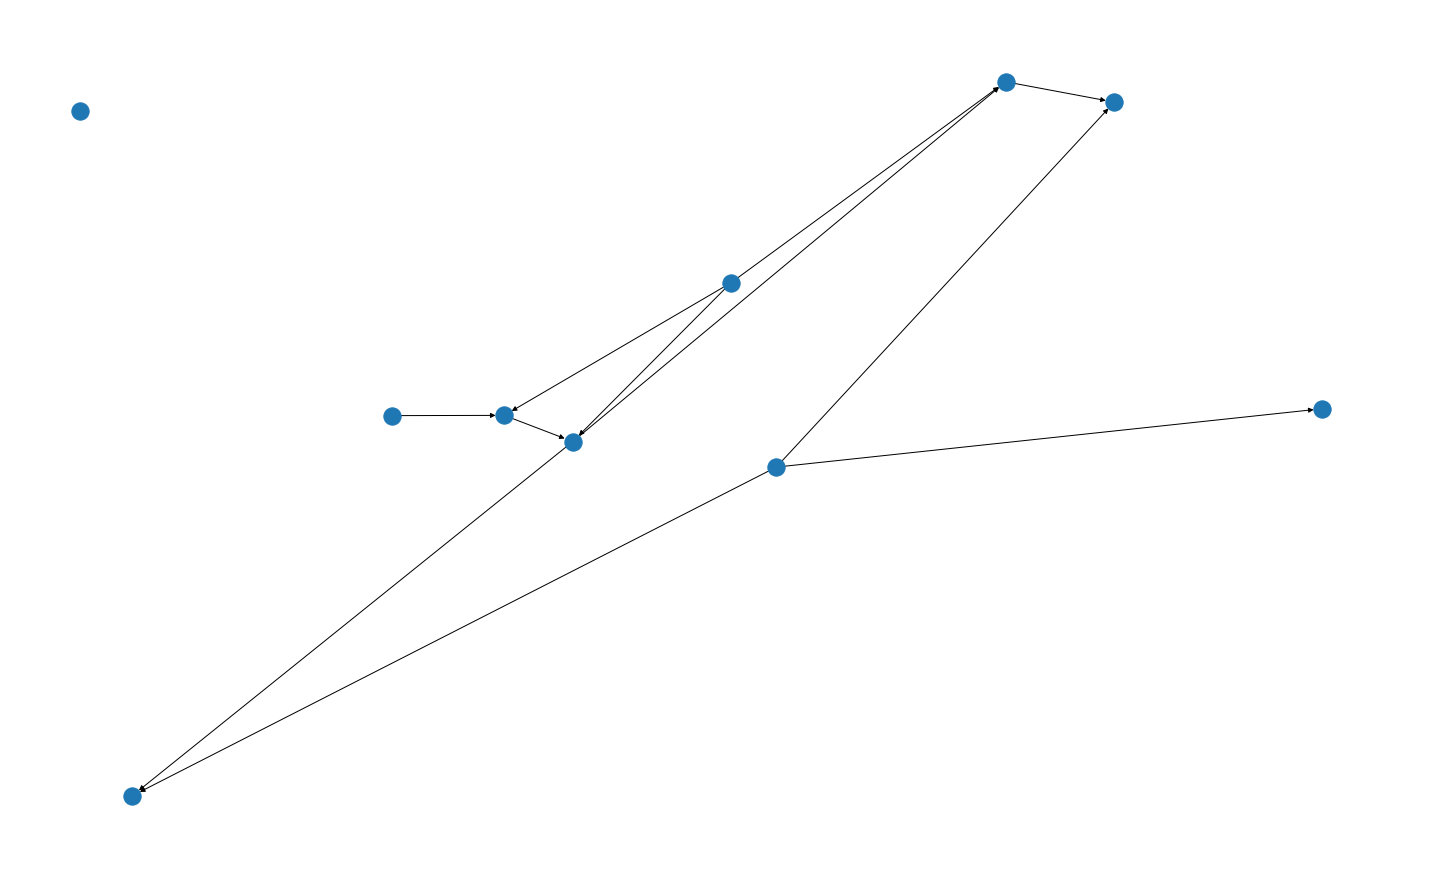

In [164]:
import networkx as nx
nx.draw(cluster_dag.cg.nx_graph)